# US births between 1994 and 2014

Author: Ye Joo Park ([ypark32@illinois.edu](mailto:ypark32@illinois.edu))

- Data Source: [FiveThirtyEight - GitHub Repository](https://github.com/fivethirtyeight/data/tree/master/births)
- Relevant Article: [Some People Are Too Superstitious To Have A Baby On Friday The 13th](http://fivethirtyeight.com/features/some-people-are-too-superstitious-to-have-a-baby-on-friday-the-13th/)
- Data License: [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/)

In [1]:
import pandas as pd
import numpy as np

### About the dataset

`US_births_1994-2003.csv` contains U.S. births data for the years 1994 to 2014, as provided by the Centers for Disease Control and Prevention's National Center for Health Statistics and the Social Security Administration.

The dataset is based on two CSV files provided by FiveThirtyEight. You can view the original CSV files at [FiveThirtyEight GitHub Repository](https://github.com/fivethirtyeight/data/tree/master/births).

In [2]:
df = pd.read_csv('US_births_1994-2014.csv')

Run the code below to print out the first 5 rows.

In [3]:
df.head()

,date,births
0,1994-01-01,8096
1,1994-01-02,7772
2,1994-01-03,10142
3,1994-01-04,11248
4,1994-01-05,11053


The dataset only contains two columns:

1. `date`: All dates between 1994 and 2014
2. `births`: Number of births for a specific date

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    7670 non-null   object
 1   births  7670 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.0+ KB


### Part 1: Handle datetime

The first step of our analysis is to 

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7670 non-null   datetime64[ns]
 1   births  7670 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 120.0 KB


In [7]:
str(df['date'].dtype)

'datetime64[ns]'

In [8]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['day_name'] = df['date'].dt.day_name()

df.head(3)

,date,births,year,month,day,weekday,day_name
0,1994-01-01,8096,1994,1,1,5,Saturday
1,1994-01-02,7772,1994,1,2,6,Sunday
2,1994-01-03,10142,1994,1,3,0,Monday


### Part 2: Summary by multiple measures

The first step of our analysis is to 

In [9]:
df['births'].mean()

11132.49374185137

In [10]:
df['births'].min()

5728

In [11]:
df['births'].max()

16081

In [17]:
df_by_year = df.groupby('year', as_index=False).agg({
      'births': 'mean'
})

df_by_year

,year,births
0,1994,10829.498630
1,1995,10683.805479
2,1996,10632.497268
3,1997,10632.586301
4,1998,10798.775342
5,1999,10847.717808
6,2000,11089.655738
7,2001,11029.953425
8,2002,11018.427397
9,2003,11205.342466


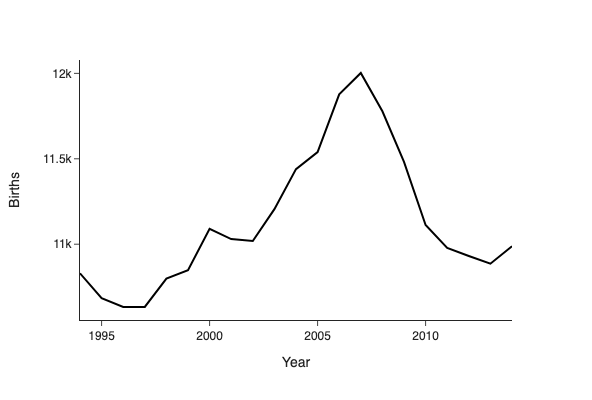

In [34]:
import plotly.express as px


fig = px.line(
    df_by_year,
    x='year',
    y='births',
    template='simple_white',
    labels={
        'births': 'Births',
        'year': 'Year',
    },
    height=400,
    color_discrete_sequence=['black']
)

fig.update_layout(
    font_family='Helvetica, Inter, Arial, sans-serif',
)

fig.show()

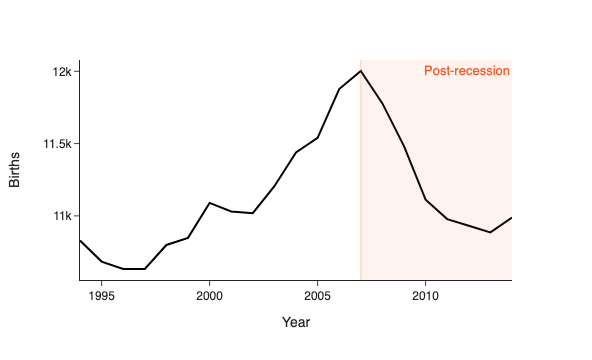

In [33]:
import plotly.express as px


fig = px.line(
    df_by_year,
    x='year',
    y='births',
    template='simple_white',
    labels={
        'births': 'Births',
        'year': 'Year',
    },
    height=400,
    color_discrete_sequence=['black']
)

fig.update_layout(
    font_family='Helvetica, Inter, Arial, sans-serif',
)

fig.add_vrect(
    x0=2007,
    x1=2014, 
    annotation_text="Post-recession",
    annotation_position="top right",
    annotation=dict(
        font_color='#FF5722',
        font_size=13
    ),
    fillcolor="#FF5722",
    opacity=0.07,
    line_width=0
)
fig.add_vline(x=2007, line_width=1, line_dash="solid", line_color="#FF5722")

fig.show()

In [13]:
feb_29th_mask = (df['month'] == 2) & (df['day'] == 29)

df_feb_29th = df[feb_29th_mask]
df_feb_29th

,date,births,year,month,day,weekday,day_name
789,1996-02-29,10692,1996,2,29,3,Thursday
2250,2000-02-29,11645,2000,2,29,1,Tuesday
3711,2004-02-29,7301,2004,2,29,6,Sunday
5172,2008-02-29,11631,2008,2,29,4,Friday
6633,2012-02-29,11042,2012,2,29,2,Wednesday


In [14]:
df_not_feb_29th[~df_not_feb_29th['year'] \
    .isin(df_feb_29th['year'])]

NameError: name 'df_not_feb_29th' is not defined

In [ ]:
df_not_feb_29th = df[~feb_29th_mask]
df_not_feb_29th[~df_not_feb_29th['year'] \
    .isin(df_feb_29th['year'])] \
    .groupby('year', as_index=False) \
    .agg({
        'births': np.mean
    })

In [ ]:
friday_13th = (df['day_name'] == 'Friday') & (df['day'] == 13)

df[friday_13th]